In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sys import platform
from scr import cleaning
from scr import models
from scr import bestmodel
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
from scr import cleaning

In [40]:
#Loading dataset 
df_train,df_test = cleaning.import_data()

## 1. Data exploration 

`df_train`

In [41]:
print(cleaning.exploration(df_train))

<bound method DataFrame.info of           id  carat        cut color clarity  depth  table     x     y     z  \
0          0   1.02       Good     D     VS2   63.2   58.0  6.36  6.40  4.03   
1          1   0.35  Very Good     H    VVS2   61.0   57.0  4.54  4.57  2.77   
2          2   0.31    Premium     H    VVS1   60.5   58.0  4.43  4.40  2.67   
3          3   0.38      Ideal     E     VS1   61.4   56.0  4.66  4.69  2.87   
4          4   1.64      Ideal     G    VVS2   61.8   56.0  7.59  7.60  4.69   
...      ...    ...        ...   ...     ...    ...    ...   ...   ...   ...   
40450  40450   1.20      Ideal     G    VVS2   62.2   55.0  6.77  6.81  4.23   
40451  40451   1.50       Good     H     VS1   64.2   56.0  7.30  7.09  4.62   
40452  40452   1.06      Ideal     E     VS2   61.9   55.0  6.54  6.58  4.06   
40453  40453   0.31    Premium     D     SI2   60.1   58.0  4.40  4.38  2.64   
40454  40454   2.00  Very Good     J     SI1   60.8   58.0  7.99  8.07  4.88   

       

In [42]:
df_train = cleaning.cleaning(df_train)
df_train = df_train.drop("id", axis=1)
df_train

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.02,4,1,6,0.561111,0.288462,0.592179,0.201258,0.126730,8.928
1,0.35,3,5,4,0.500000,0.269231,0.422719,0.143711,0.087107,6.477
2,0.31,2,5,3,0.486111,0.288462,0.412477,0.138365,0.083962,6.810
3,0.38,1,2,5,0.511111,0.250000,0.433892,0.147484,0.090252,6.824
4,1.64,1,4,4,0.522222,0.250000,0.706704,0.238994,0.147484,9.776
...,...,...,...,...,...,...,...,...,...,...
40450,1.20,1,4,4,0.533333,0.230769,0.630354,0.214151,0.133019,9.149
40451,1.50,4,5,5,0.588889,0.250000,0.679702,0.222956,0.145283,9.077
40452,1.06,1,2,6,0.525000,0.230769,0.608939,0.206918,0.127673,8.892
40453,0.31,2,1,8,0.475000,0.288462,0.409683,0.137736,0.083019,6.385


In [43]:
df_train.drop_duplicates(inplace= True)

`Heatmap: Which are the most correlated columns?`

<Axes: >

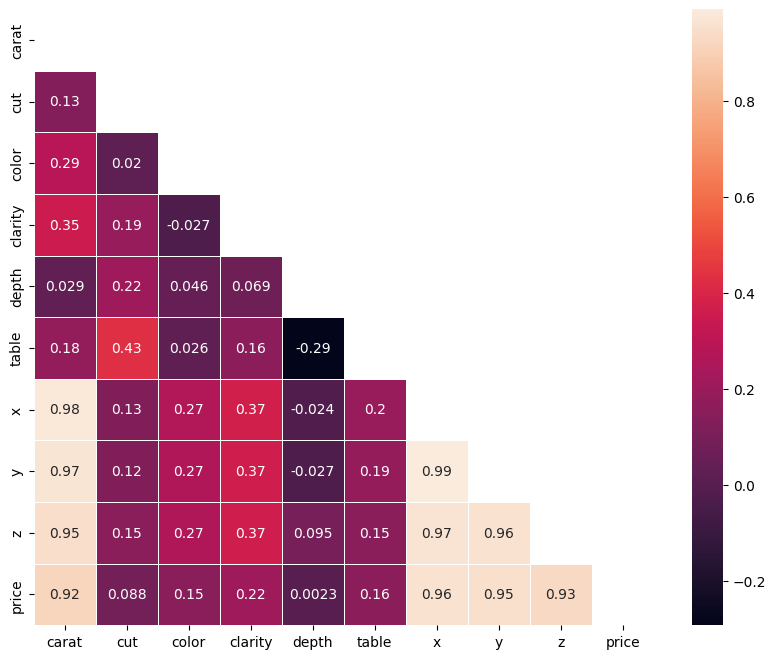

In [44]:
plt.figure(figsize=(10, 8))
train_corr = df_train.corr()
mask = np.triu(np.ones_like(df_train.corr()), k=0)
sns.heatmap(train_corr, annot= True, mask=mask, linewidths=0.5)

`Dropping columns with high relationship`

In [45]:
df_train = df_train.drop(columns= ["depth","y"])

<Axes: >

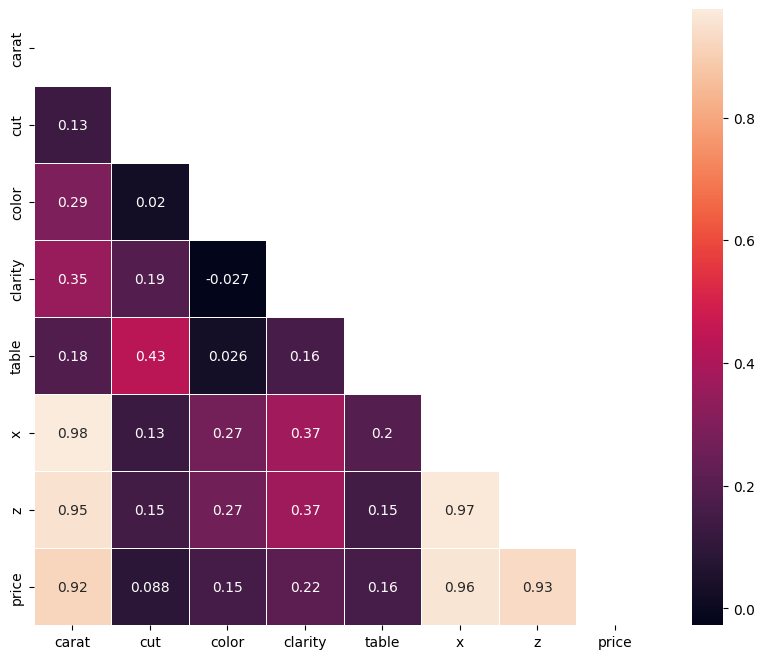

In [46]:
plt.figure(figsize=(10, 8))
train_2corr = df_train.corr()
mask1 = np.triu(np.ones_like(df_train.corr()), k=0)
sns.heatmap(train_2corr, annot= True, mask=mask1, linewidths=0.5)

In [47]:
X = df_train.iloc[:,:-1]
y = df_train['price']

`65:35 dataset split`

In [48]:
X_train, X_test, y_train, y_test = models.split_65(X,y)

In [49]:
models.training(X_train, y_train)

Training: LinReg
{'carat': -0.691267831378876, 'cut': 0.0006666586541430597, 'color': -0.07798376531784057, 'clarity': -0.11579537870214374, 'table': -0.3974436885904966, 'x': 12.53597778536881, 'z': 4.374336484623752}
Training: LinRidge
{'carat': -0.49151507561762786, 'cut': -0.000269425855169428, 'color': -0.07864288502012098, 'clarity': -0.11395016671345397, 'table': -0.3664752609983233, 'x': 11.816090512017222, 'z': 3.325465445050619}
Training: LinLasso
{'carat': 0.0, 'cut': 0.0, 'color': 0.0, 'clarity': 0.0, 'table': 0.0, 'x': 0.0, 'z': 0.0}
Training: SGD
{'carat': 1.4928841239170285, 'cut': -0.037934812734372304, 'color': -0.08719834163861304, 'clarity': -0.09337216052007986, 'table': 1.088632651054104, 'x': 3.027316625394849, 'z': 0.6357848724599697}
Training: knn
Feature ranking not available for knn
Training: grad
{'carat': 0.6453790362570659, 'cut': 0.0012321486785162726, 'color': 0.011963969324424794, 'clarity': 0.029676993551999487, 'table': 7.852143438245508e-05, 'x': 0.29

In [50]:
models.assess_models(X_test, y_test)

------------LinReg------------

MAE, error: 0.12740786832017623
MSE, error: 0.03212795529890623
RMSE, error: 0.17924272732500537
r2: 0.9683312189085844


------------LinRidge------------

MAE, error: 0.1312907467018897
MSE, error: 0.033032483894594844
RMSE, error: 0.1817484082312548
r2: 0.9674396178769817


------------LinLasso------------

MAE, error: 0.8708343594857448
MSE, error: 1.0145047433194567
RMSE, error: 1.0072262622268429
r2: -5.395098405802656e-06


------------SGD------------

MAE, error: 0.2289651800335332
MSE, error: 0.08711228443099045
RMSE, error: 0.2951479026369499
r2: 0.9141327283248527


------------knn------------

MAE, error: 0.09604363275996318
MSE, error: 0.022771245637431863
RMSE, error: 0.15090144345708514
r2: 0.9775542020473605


------------grad------------

MAE, error: 0.08257667686757013
MSE, error: 0.011872551987391606
RMSE, error: 0.1089612407573978
r2: 0.988297131068968


------------svr------------

MAE, error: 0.10419004969566856
MSE, error: 0.0175842

`Best model performing: GradientBoostingRegressor()` with a correlation coefficient (r2) of 0.9889

Use `GridSearch` to obtain the best combination

In [51]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

#Hyperparameter tuning
gradient_param = {
    'max_depth': [10, 15, 20], 
    'n_estimators': [100, 200, 500]}

gradientgrid = GridSearchCV(GradientBoostingRegressor(random_state=79), gradient_param)
gradientgrid.fit(X_train, y_train)
print(gradientgrid.best_params_)
print('Best score: ', gradientgrid.best_score_)

{'max_depth': 10, 'n_estimators': 100}
Best score:  0.9897460826111473


`Second best model performing: RandomForestRegressor()` with a correlation coefficient (r2) of 0.9885

Use `GridSearch` to obtain the best combination

In [52]:
#Hyperparameter tuning
randforest_param = {
    'max_depth': [10, 15, 20], 
    'n_estimators': [100, 200, 500]}

forestgrid = GridSearchCV(RandomForestRegressor(random_state=79), randforest_param)
forestgrid.fit(X_train, y_train)
print(forestgrid.best_params_)
print('Best score: ', forestgrid.best_score_)

{'max_depth': 15, 'n_estimators': 500}
Best score:  0.9894093842403031


`Training again :)`

In [53]:
#Random Forest Regressor
rf_model = RandomForestRegressor(max_depth= 15, n_estimators= 500)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print(f"MAE, error: {metrics.mean_absolute_error(y_test, y_pred_rf)}")
print(f"MSE, error: {metrics.mean_squared_error(y_test, y_pred_rf)}")
print(f"RMSE, error: {np.sqrt(metrics.mean_squared_error(y_test, y_pred_rf))}")
print(f"r2: {metrics.r2_score(y_test, y_pred_rf)}")

MAE, error: 0.07742831848001967
MSE, error: 0.010743651030290298
RMSE, error: 0.1036515847939157
r2: 0.9894098977219254


In [54]:
#Gradient Boosting Regresor
gb_model = GradientBoostingRegressor(max_depth= 10, n_estimators= 100)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)
print(f"MAE, error: {metrics.mean_absolute_error(y_test, y_pred_gb)}")
print(f"MSE, error: {metrics.mean_squared_error(y_test, y_pred_gb)}")
print(f"RMSE, error: {np.sqrt(metrics.mean_squared_error(y_test, y_pred_gb))}")
print(f"r2: {metrics.r2_score(y_test, y_pred_gb)}")

MAE, error: 0.0747574276666199
MSE, error: 0.010247259142582251
RMSE, error: 0.10122874662161066
r2: 0.9898991951540567


`df test`

In [57]:
df_test = pd.read_csv("../lab-machine-learning-pipeline/data/test.csv")

In [58]:
print(cleaning.exploration(df_test))

<bound method DataFrame.info of           id  carat        cut color clarity  depth  table     x     y     z
0          0   0.81      Ideal     F     SI1   61.5   57.0  6.01  6.06  3.71
1          1   0.50       Fair     F      I1   63.8   58.0  5.08  4.97  3.21
2          2   0.31      Ideal     D    VVS2   60.1   56.0  4.43  4.46  2.67
3          3   1.52       Fair     I     SI2   64.7   58.0  7.19  7.22  4.66
4          4   0.35    Premium     D    VVS1   60.8   58.0  4.55  4.53  2.76
...      ...    ...        ...   ...     ...    ...    ...   ...   ...   ...
13480  13480   0.52      Ideal     D    VVS2   61.4   56.0  5.23  5.20  3.20
13481  13481   1.01  Very Good     E     VS2   59.3   59.0  6.50  6.56  3.87
13482  13482   1.50    Premium     H     VS2   60.6   61.0  7.34  7.31  4.44
13483  13483   0.40      Ideal     E    VVS2   62.5   54.0  4.75  4.76  2.97
13484  13484   2.01    Premium     H     VS2   61.6   61.0  8.14  8.07  4.99

[13485 rows x 10 columns]>
id         0
car

In [59]:
df_test.duplicated().sum()

0

In [60]:
df_test = cleaning.cleaning(df_test)
df_test

,id,carat,cut,color,clarity,depth,table,x,y,z
0,0,0.81,1,3,7,0.513889,0.448276,0.592702,0.102886,0.460298
1,1,0.50,5,3,9,0.577778,0.482759,0.500986,0.084380,0.398263
2,2,0.31,1,1,4,0.475000,0.413793,0.436884,0.075722,0.331266
3,3,1.52,5,6,8,0.602778,0.482759,0.709073,0.122581,0.578164
4,4,0.35,2,1,3,0.494444,0.482759,0.448718,0.076910,0.342432
...,...,...,...,...,...,...,...,...,...,...
13480,13480,0.52,1,1,4,0.511111,0.413793,0.515779,0.088285,0.397022
13481,13481,1.01,3,2,6,0.452778,0.517241,0.641026,0.111375,0.480149
13482,13482,1.50,2,5,6,0.488889,0.586207,0.723866,0.124109,0.550868
13483,13483,0.40,1,2,4,0.541667,0.344828,0.468442,0.080815,0.368486


In [61]:
df_new_test = df_test.drop(columns= ["id","depth", "y"])

In [62]:
y_pred_test = gb_model.predict(df_new_test)

In [63]:
print("Length of y_pred_rf:", len(y_pred_test))
print("Length of df_test before reset:", len(df_test))


Length of y_pred_rf: 13485
Length of df_test before reset: 13485


In [64]:
df_test = df_test.reset_index(drop=True)

df_for_submission = pd.DataFrame({'id': df_test['id'], 'price': y_pred_test})

In [65]:
print(df_for_submission.shape[0])
df_for_submission.sample()

13485


,id,price
1839,1839,6.779127


In [66]:
df_for_submission.to_csv("my_submission1.csv", index=False)

# Just for feedback
if platform == "darwin":
    os.system("say redi for submission")

In [67]:
df_for_submission.head()

,id,price
0,0,7.957041
1,1,6.840350
2,2,7.127275
3,3,8.864605
4,4,7.315294


In [ ]:
df_for_submission.head()

,id,price
0,0,7.993303
1,1,6.744490
2,2,6.707629
3,3,8.780870
4,4,7.068462
